In [1]:
import sys
 
sys.path.insert(0, "../")

from EnsembleFramework import Framework

In [2]:
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.utils import add_self_loops

dataset_name = 'Cora'
split = "public"
dataset = Planetoid(root='/tmp/Cora', name=dataset_name, split=split)
dataset.transform = T.NormalizeFeatures()

features =  dataset[0].x
y =  dataset[0].y

test =  dataset[0].test_mask
train = dataset[0].train_mask
val =  dataset[0].val_mask

edge_index = dataset[0].edge_index 
edge_index = add_self_loops(edge_index)[0]

In [3]:
import pandas as pd
import ast

hops_to_best_params_df = pd.read_csv("normalized_origin_features_plus_summed_neighbors_wo_attn.csv")
evaluated_hops = hops_to_best_params_df.iloc[:,0].values
best_params = hops_to_best_params_df.iloc[:,1].values
hops_to_best_params = dict({hop: ast.literal_eval(best_params[i]) for i, hop in enumerate(evaluated_hops)})
hops_to_best_params

{0: {'alpha': 0.4571739668011579,
  'eta': 0.0684637455636455,
  'max_depth': 10,
  'min_child_weight': 1.0879291828706985,
  'n_estimators': 50,
  'reg_lambda': 0.9989043477517809,
  'subsample': 0.7807260313867671},
 1: {'alpha': 0.09831103468637342,
  'eta': 0.4452666426221805,
  'max_depth': 10,
  'min_child_weight': 0.0005296727315298623,
  'n_estimators': 200,
  'reg_lambda': 0.7762759151220954,
  'subsample': 0.8244376991222684},
 2: {'alpha': 0.05487728942766973,
  'eta': 0.13707633234036656,
  'max_depth': 10,
  'min_child_weight': 0.25471441997979205,
  'n_estimators': 1000,
  'reg_lambda': 0.0037469728466333757,
  'subsample': 0.6531040139096074},
 3: {'alpha': 0.2116187059262214,
  'eta': 0.4091962218808652,
  'max_depth': 4,
  'min_child_weight': 0.5874901028410324,
  'n_estimators': 800,
  'reg_lambda': 0.7925018010617298,
  'subsample': 0.6072642036741627},
 4: {'alpha': 0.6122299597839542,
  'eta': 0.11280078958803384,
  'max_depth': 2,
  'min_child_weight': 3.737568166

In [4]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(scores):
    node_labels = y.cpu().numpy()
    num_classes = len(set(node_labels))
    
    t_sne_embeddings = TSNE(n_components=2, perplexity=30, method='barnes_hut').fit_transform(scores)
    
    fig = plt.figure(figsize=(12,8), dpi=80)  # otherwise plots are really small in Jupyter Notebook
    cora_label_to_color_map = {0: "red", 1: "blue", 2: "green", 3: "orange", 4: "yellow", 5: "pink", 6: "gray"}
    for class_id in range(num_classes):
        
        plt.scatter(t_sne_embeddings[node_labels == class_id, 0], t_sne_embeddings[node_labels == class_id, 1], s=20, color=cora_label_to_color_map[class_id], edgecolors='black', linewidths=0.2)
    plt.show()

In [7]:
# hops_to_best_params = {0: {'alpha': 0.3661674880989574,
#   'eta': 0.08030656155770369,
#   'max_depth': 8,
#   'min_child_weight': 0.015421722321114384,
#   'n_estimators': 500,
#   'reg_lambda': 0.5385962777372832,
#   'subsample': 0.8898376691953283},
#  1: {'alpha': 0.3896861783669125,
#   'eta': 0.08117531255517542,
#   'max_depth': 6,
#   'min_child_weight': 0.009732452739181932,
#   'n_estimators': 500,
#   'reg_lambda': 0.3699297901186947,
#   'subsample': 0.6836527355492652},
#  2: {'alpha': 0.08618426573087284,
#   'eta': 0.1105563541274621,
#   'max_depth': 6,
#   'min_child_weight': 1.5627106953099057,
#   'n_estimators': 150,
#   'reg_lambda': 0.6164890465577058,
#   'subsample': 0.8110265217674013},
#  3: {'alpha': 0.6467758651099587,
#   'eta': 0.11397582436975871,
#   'max_depth': 5,
#   'min_child_weight': 3.300355484731074,
#   'n_estimators': 1200,
#   'reg_lambda': 0.8274021692419901,
#   'subsample': 0.600707524799005},
#  5: {'alpha': 0.7691513478149516,
#   'eta': 0.0526539690400146,
#   'max_depth': 2,
#   'min_child_weight': 3.3399094056548,
#   'n_estimators': 1000,
#   'reg_lambda': 0.9820192823044702,
#   'subsample': 0.9490550535732927},
#  10: {'alpha': 0.01686572783598332,
#   'eta': 0.07444135614616233,
#   'max_depth': 2,
#   'min_child_weight': 0.18441745507137505,
#   'n_estimators': 100,
#   'reg_lambda': 0.937011629619151,
#   'subsample': 0.7674182481116684}}

XGBoost with [0] hops has the following accuracies:
Train acc: 0.9285714285714286; Val acc 0.562; Test acc 0.555
The required training time was 0.43 s


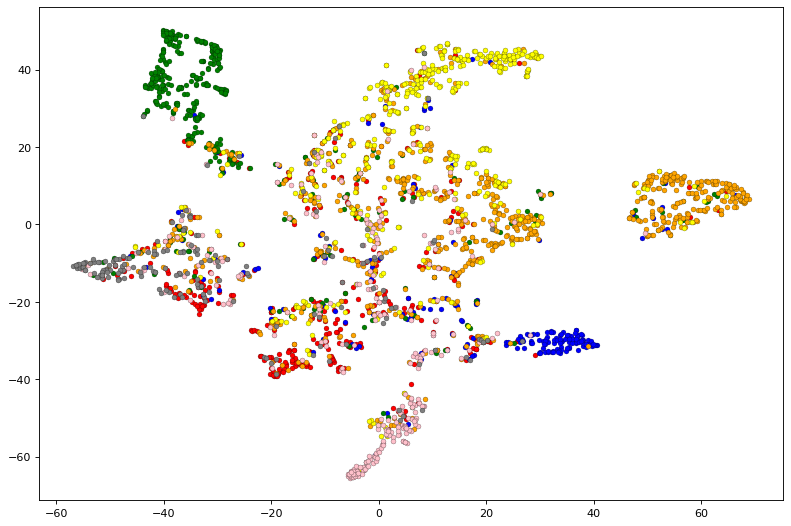

XGBoost with [1] hops has the following accuracies:
Train acc: 1.0; Val acc 0.75; Test acc 0.728
The required training time was 0.82 s


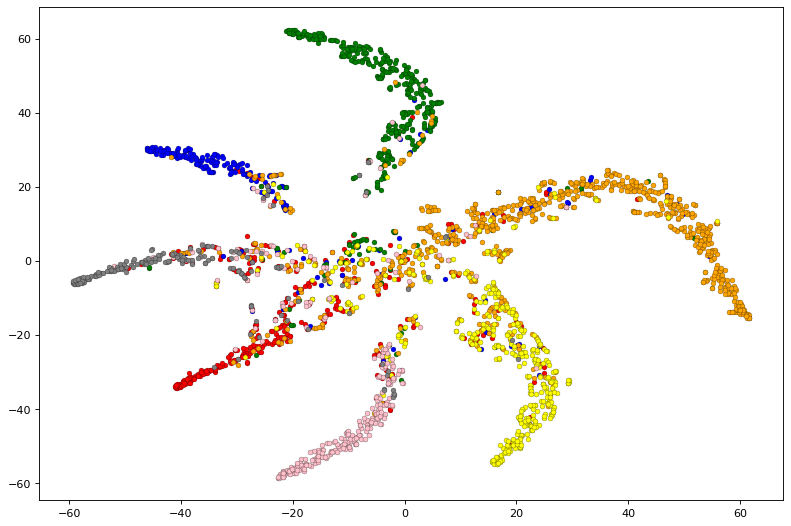

XGBoost with [2] hops has the following accuracies:
Train acc: 1.0; Val acc 0.796; Test acc 0.765
The required training time was 2.68 s


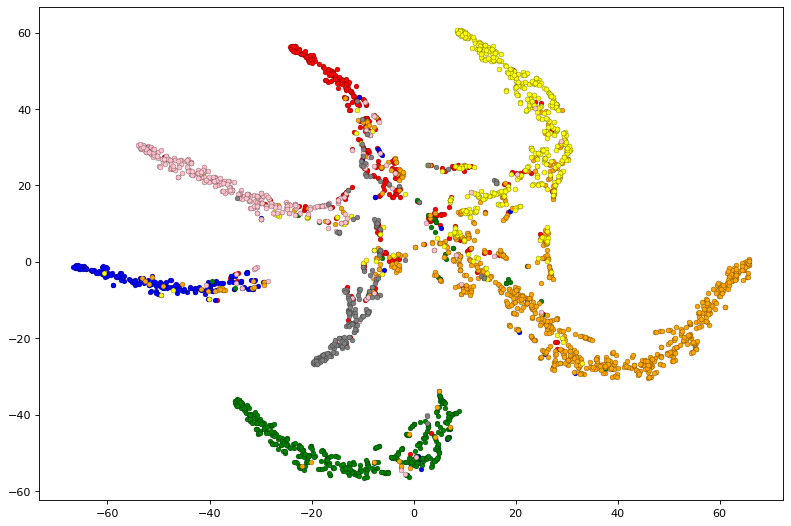

XGBoost with [3] hops has the following accuracies:
Train acc: 1.0; Val acc 0.796; Test acc 0.793
The required training time was 2.6 s


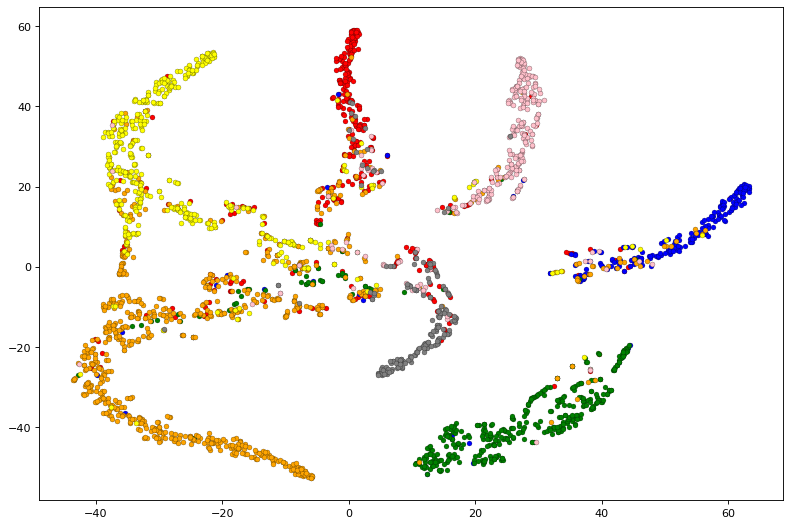

XGBoost with [4] hops has the following accuracies:
Train acc: 1.0; Val acc 0.802; Test acc 0.779
The required training time was 2.79 s


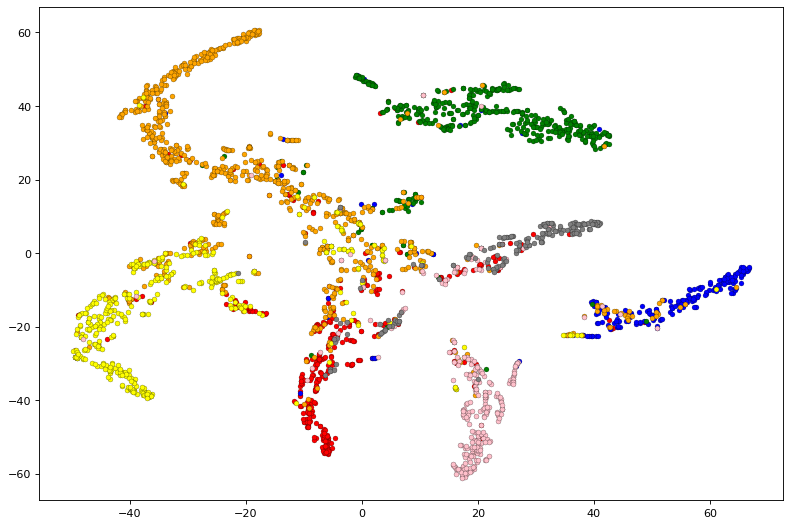

XGBoost with [5] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.802; Test acc 0.781
The required training time was 1.81 s


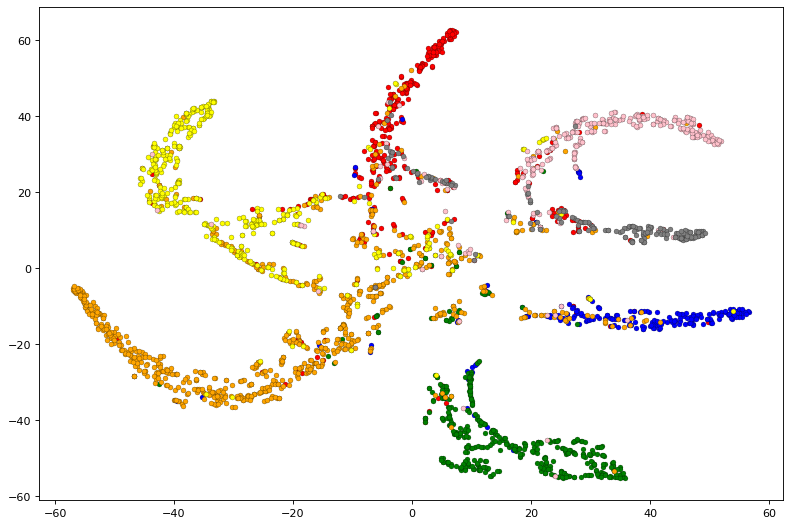

XGBoost with [6] hops has the following accuracies:
Train acc: 1.0; Val acc 0.806; Test acc 0.785
The required training time was 3.2 s


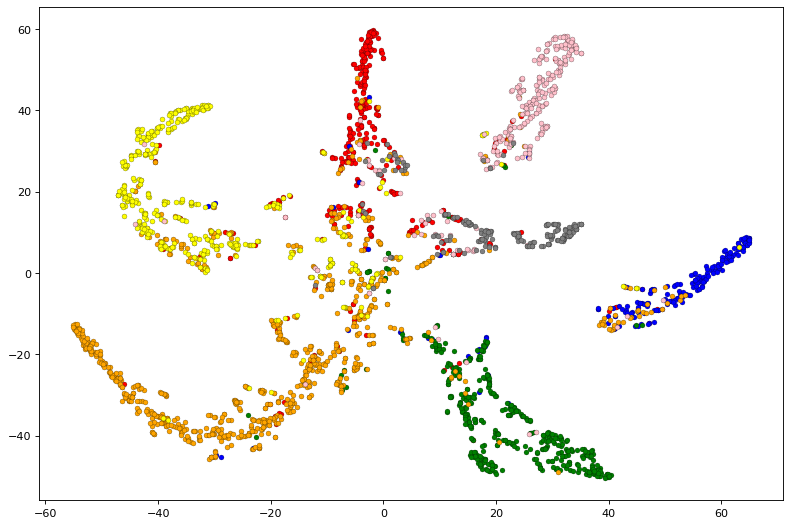

XGBoost with [7] hops has the following accuracies:
Train acc: 1.0; Val acc 0.808; Test acc 0.784
The required training time was 4.23 s


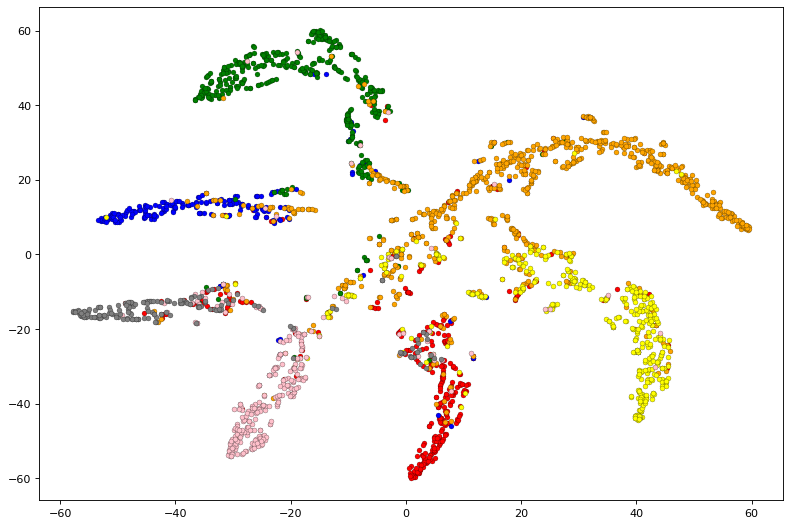

XGBoost with [8] hops has the following accuracies:
Train acc: 1.0; Val acc 0.788; Test acc 0.763
The required training time was 4.38 s


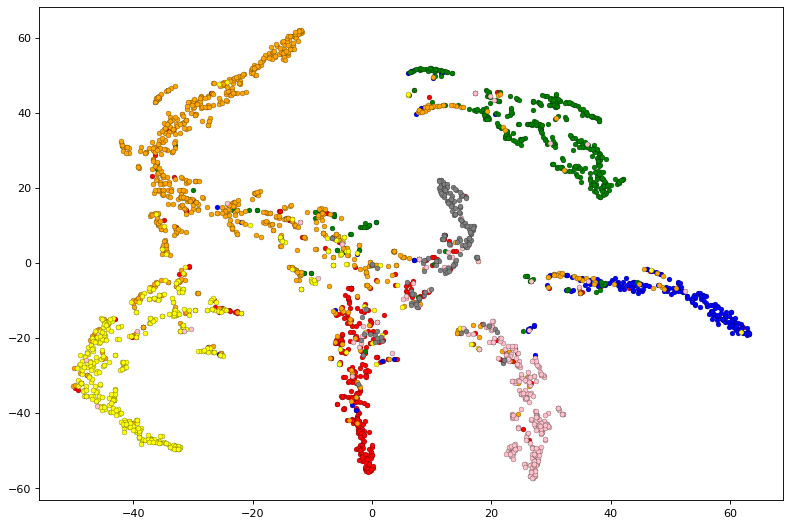

XGBoost with [9] hops has the following accuracies:
Train acc: 1.0; Val acc 0.798; Test acc 0.777
The required training time was 3.62 s


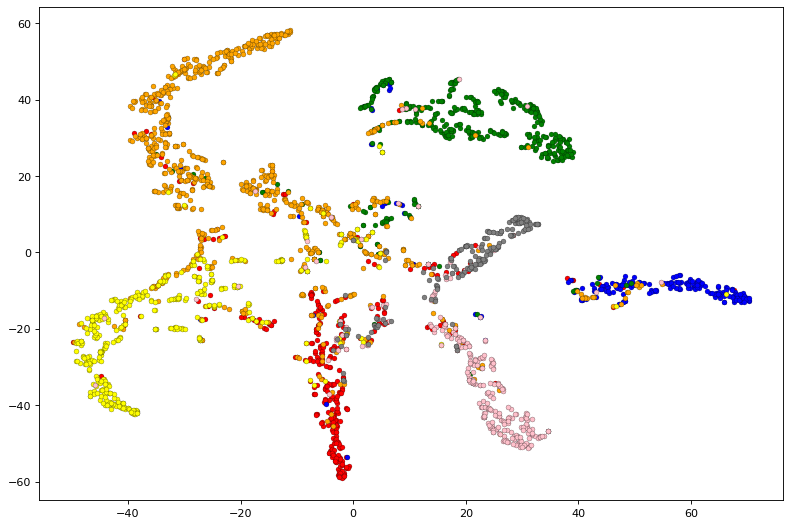

XGBoost with [10] hops has the following accuracies:
Train acc: 1.0; Val acc 0.808; Test acc 0.775
The required training time was 3.53 s


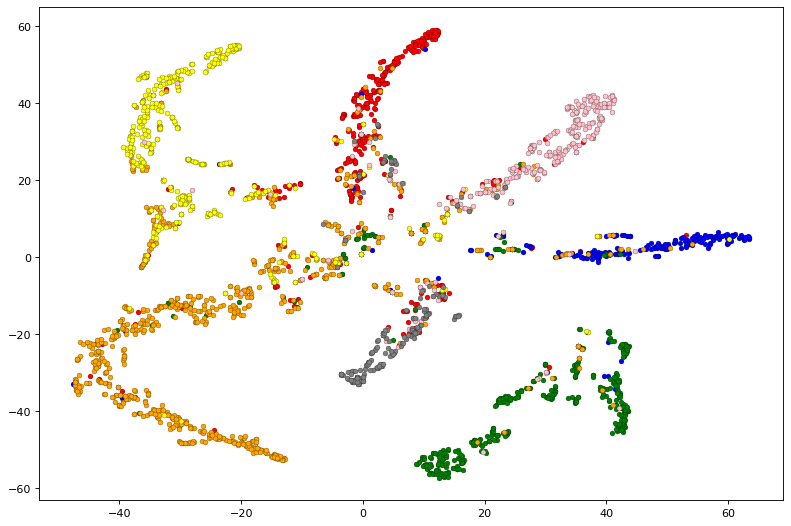

XGBoost with [15] hops has the following accuracies:
Train acc: 0.9928571428571429; Val acc 0.806; Test acc 0.792
The required training time was 2.13 s


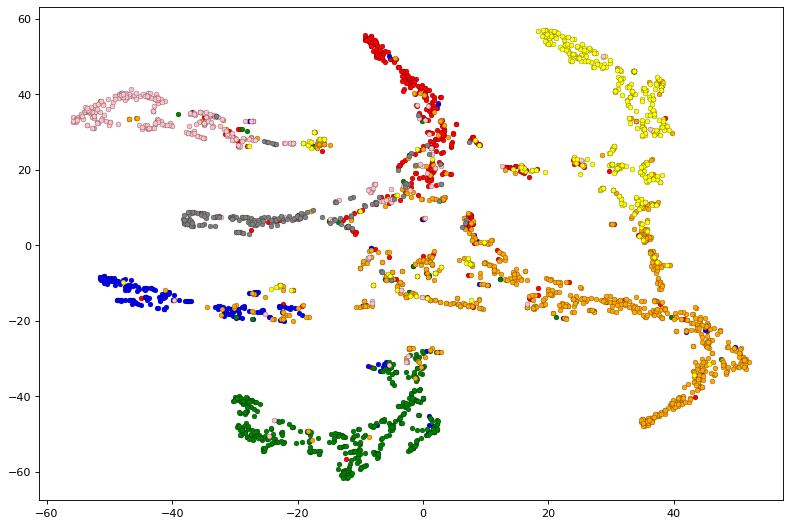

XGBoost with [20] hops has the following accuracies:
Train acc: 1.0; Val acc 0.808; Test acc 0.791
The required training time was 4.8 s


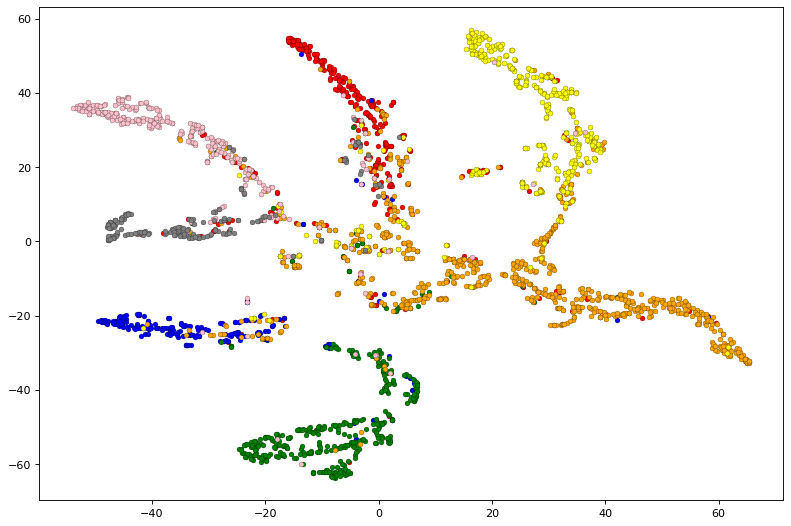

XGBoost with [30] hops has the following accuracies:
Train acc: 1.0; Val acc 0.802; Test acc 0.795
The required training time was 3.4 s


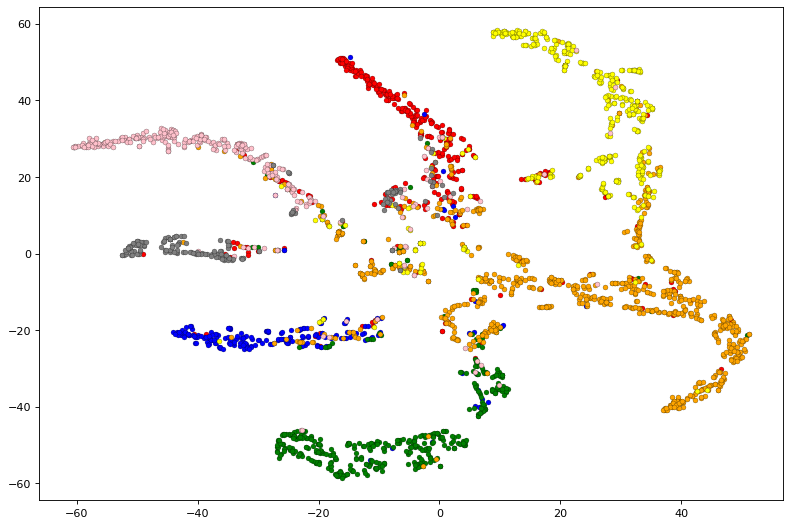

XGBoost with [40] hops has the following accuracies:
Train acc: 0.9714285714285714; Val acc 0.808; Test acc 0.789
The required training time was 2.42 s


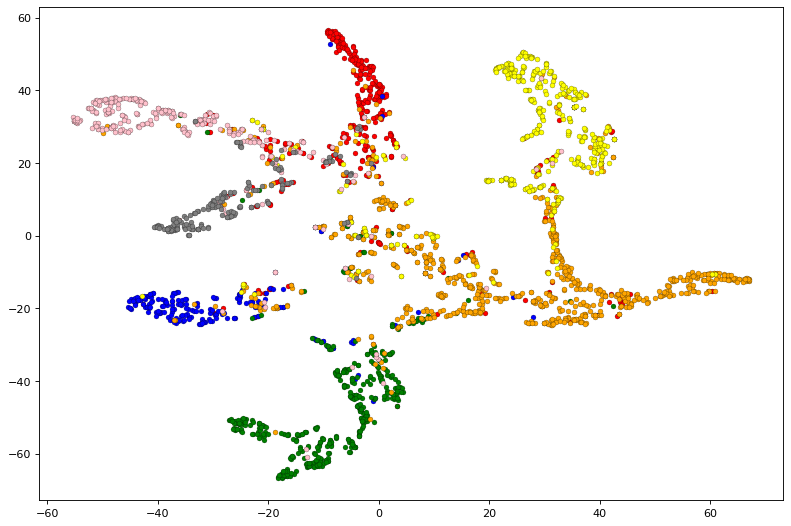

XGBoost with [50] hops has the following accuracies:
Train acc: 1.0; Val acc 0.812; Test acc 0.792
The required training time was 2.78 s


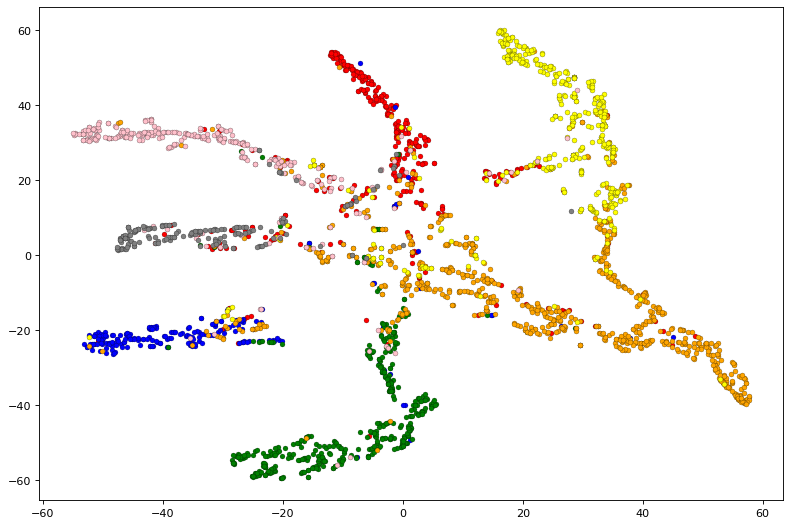

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time
from torch.nn.functional import normalize
import torch 
def user_function(kwargs):
    return  normalize(kwargs["original_features"] + kwargs["summed_neighbors"], p = 2.0, dim = 1)
    
for hop in evaluated_hops:
    hops_list = [hop]
    
    clfs = [
        XGBClassifier(**hops_to_best_params[hops], random_state = 42,  tree_method = "hist", device="cuda:1") for hops in hops_list
    ]
    framework = Framework([user_function for i in hops_list], 
                         hops_list=hops_list, ## to obtain best for local neighborhood
                         clfs=clfs,
                         gpu_idx=0,
                         handle_nan=0.0,
                        attention_configs=[None for i in hops_list])
    start = time.time()
    framework.fit(features,
                edge_index,
                y,
                train)
    train_time = time.time()-start
    
    y_pred_val = framework.predict(features,
                    edge_index,
                    val)
    y_pred_test = framework.predict(features,
                    edge_index,
                    test)
    y_pred_train = framework.predict(features,
                    edge_index,
                    train)
    y_pred_proba = framework.predict_proba(features, edge_index, torch.ones_like(y).type(torch.bool))
    val_score = accuracy_score(y[val], y_pred_val)
    test_score = accuracy_score(y[test], y_pred_test)
    train_score = accuracy_score(y[train], y_pred_train)
    print(f"XGBoost with {str(hops_list)} hops has the following accuracies:\nTrain acc: {str(train_score)}; Val acc {str(val_score)}; Test acc {str(test_score)}")
    print(f"The required training time was {str(round(train_time,2))} s")
    plot_tsne(y_pred_proba)